In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('variables_selec_manualmente_correlacion.csv')
print(df.shape)
df.head()

(263, 12)


,cantidadBuquesEnergetico,cantidadToneladasEnerg,cantidadBuquesAbono,cantidadBuques,cantidadBuquesAgroGanadero,cantidadBuquesSiderometa,cantidadToneladasOtros,cantidadToneladasDiarias,cantidadToneladasMG,cantidadBuquesQuimicos,Salida_Tarjetas,Fecha
0,9,3034,9,73,14,31,13449,51034,50249,17,176.0,2021-04-13
1,9,3034,9,75,15,32,14934,56605,55815,18,607.0,2021-04-14
2,9,2393,9,73,14,31,12818,49552,48762,15,249.0,2021-04-15
3,10,3459,9,77,15,36,14581,59816,59027,17,299.0,2021-04-16
4,9,2393,9,77,15,33,13900,50645,49849,16,72.0,2021-04-17


**Dataset con las 10 variables con mayor correlación**

In [2]:
df_variables_mas_correlacioneadas = df[["cantidadBuquesEnergetico", "cantidadToneladasEnerg", "cantidadBuquesAbono", "cantidadBuques", "cantidadBuquesAgroGanadero", "cantidadBuquesSiderometa","cantidadToneladasOtros","cantidadToneladasDiarias", "cantidadToneladasMG", "cantidadBuquesQuimicos"]]
print(df_variables_mas_correlacioneadas.shape)
df_variables_mas_correlacioneadas.head()

(263, 10)


,cantidadBuquesEnergetico,cantidadToneladasEnerg,cantidadBuquesAbono,cantidadBuques,cantidadBuquesAgroGanadero,cantidadBuquesSiderometa,cantidadToneladasOtros,cantidadToneladasDiarias,cantidadToneladasMG,cantidadBuquesQuimicos
0,9,3034,9,73,14,31,13449,51034,50249,17
1,9,3034,9,75,15,32,14934,56605,55815,18
2,9,2393,9,73,14,31,12818,49552,48762,15
3,10,3459,9,77,15,36,14581,59816,59027,17
4,9,2393,9,77,15,33,13900,50645,49849,16


**Dataset con la variable a predecir:**

In [3]:
df_salida_tarjetas = df["Salida_Tarjetas"]
print(df_salida_tarjetas.shape)
df_salida_tarjetas.head()

(263,)


0    176.0
1    607.0
2    249.0
3    299.0
4     72.0
Name: Salida_Tarjetas, dtype: float64

**Dataset con todas las 23 variables calculadas:**

In [4]:
df_variables_completo = pd.read_csv ('df_todas_las_variables.csv')
df_variables_completo = df_variables_completo.drop("Unnamed: 0", axis = 1)
print(df_variables_completo.shape)
df_variables_completo.columns

(263, 23)


Index(['Buques', 'BuquesAbono', 'BuquesAgroGanadero', 'BuquesEnergetico',
       'BuquesConstruccion', 'BuquesNoMetal', 'BuquesOtraM', 'BuquesQuimicos',
       'BuquesSiderometa', 'BuquesVehiculos', 'ToneladasDiarias',
       'ToneladasGL', 'ToneladasGS', 'ToneladasMG', 'ToneladasAbono',
       'ToneladasAgroGan', 'ToneladasEnerg', 'ToneladasConstr',
       'ToneladasNoMet', 'ToneladasOtros', 'ToneladasQuimic',
       'ToneladasSideromet', 'ToneladasVehicul'],
      dtype='object')

### DIVIDIMOS EL DATASET EN CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE TEST 

### Para cada modelo

**Para el modelo que utilizará todas las variables**

In [5]:
from sklearn.model_selection import train_test_split

X_trainC, X_testC, y_trainC, y_testC = train_test_split(df_variables_completo, df_salida_tarjetas, test_size=0.2, random_state=0)
print(X_trainC.shape)
print(X_testC.shape)
print(y_trainC.shape)
print(y_testC.shape)

(210, 23)
(53, 23)
(210,)
(53,)


**Para el modelo que utilizará las variables de mayor correlación**

In [6]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(df_variables_mas_correlacioneadas, df_salida_tarjetas, test_size=0.2, random_state=0)
print(X_trainR.shape)
print(X_testR.shape)
print(y_trainR.shape)
print(y_testR.shape)

(210, 10)
(53, 10)
(210,)
(53,)


**COMENTAR: Al seleccionar las primeras diez variables de la selección automática realizada nos encontramos con las siguientes variables:**

-cantidadBuquesConstruccion
-cantidadBuquesNoMetal
-cantidadBuquesOtraM
-cantidadBuquesVehiculos

**que no aparecen en las variables seleccionadas al observar la correlación y además en este conjunto mencionado aparecen las variables:**

cantidadToneladasEnerg
cantidadToneladasOtros
cantidadToneladasDiarias
cntidadToneladasMG

**que no aparecen entre las variables primeras 10 seleccionadas dentro de la ordenación realizada por el algoritmo**

# APLICACIÓN DEL MODELO DE REGRESIÓN LINEAL MULTIVARIABLE CON LOS TRES CONJUNTOS: AMBAS REDUCCIONES DE VARIABLES Y EL CONJUNTO COMPLETO DE ELLAS

**Selección manual de las variables:**

Media del coeficiente de determinación:  0.3790611962999315
Desviación típica del coeficiente de determinación: 0.1011135292006236
Media del error cuadrático medio:  -27419.470978746023
Desviación típica del error cuadrático medio: 7200.511581075737
Media del la raíz del error cuadrático medio:  -164.10272622861046
Desviación típica de la raíz del error cuadrático medio: 22.130662508920437
Media del la raíz del MAE:  -126.46341632244621
Desviación típica de MAE: 18.434276920074794


Text(0, 0.5, 'Coeficiente de determinación')

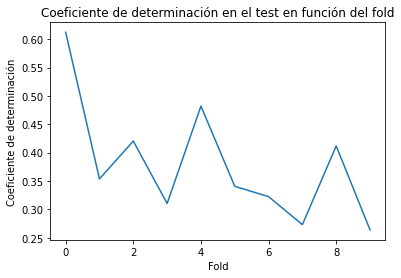

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



lm = LinearRegression(fit_intercept=True, normalize=True)
scores = cross_validate(lm, X_trainR, y_trainR, scoring={"RMSE":'neg_root_mean_squared_error',"Coeficiente de determinacion":'r2',"MSE": "neg_mean_squared_error", "MAE": "neg_mean_absolute_error"}, cv=10)

print("Media del coeficiente de determinación: ",np.mean(scores["test_Coeficiente de determinacion"]))
print("Desviación típica del coeficiente de determinación:",np.std(scores["test_Coeficiente de determinacion"]))
print("Media del error cuadrático medio: ",np.mean(scores["test_MSE"]))
print("Desviación típica del error cuadrático medio:",np.std(scores["test_MSE"]))
print("Media del la raíz del error cuadrático medio: ",np.mean(scores["test_RMSE"]))
print("Desviación típica de la raíz del error cuadrático medio:",np.std(scores["test_RMSE"]))
print("Media del la raíz del MAE: ",np.mean(scores["test_MAE"]))
print("Desviación típica de MAE:",np.std(scores["test_MAE"]))

plt.plot(range(0,10),scores["test_Coeficiente de determinacion"])
plt.title("Coeficiente de determinación en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Coeficiente de determinación")


#Medida de error: raíz del error cuadrático medio

Text(0, 0.5, 'Valor del RMSE')

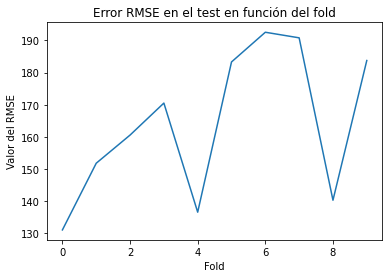

In [8]:
plt.plot(range(0,10),-scores["test_RMSE"])
plt.title("Error RMSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del RMSE")

Text(0, 0.5, 'Valor del MSE')

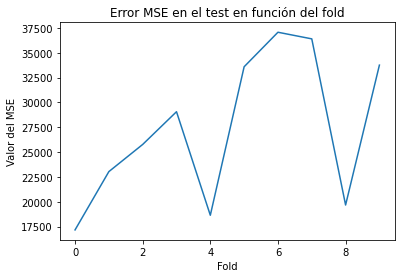

In [9]:
plt.plot(range(0,10),-scores["test_MSE"])
plt.title("Error MSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MSE")

Text(0, 0.5, 'Valor del MAE')

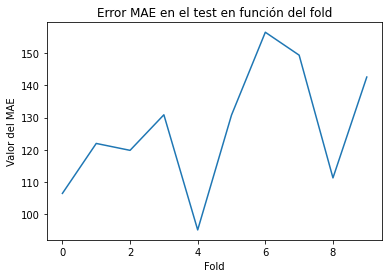

In [10]:
plt.plot(range(0,10),-scores["test_MAE"])
plt.title("Error MAE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MAE")

In [11]:
#Características del modelo creado (valor de los coeficientes)
reg = LinearRegression(fit_intercept=True, normalize=True).fit(X_trainR, y_trainR)
print(reg.coef_)
print(reg.intercept_)

[ 3.19726509e+01  3.91870535e-02  2.16649084e+01 -5.12419031e+00
  6.27457131e+00  1.58533387e+01  6.04791160e-03 -2.58312851e-02
  1.65786508e-02 -8.59321775e+00]
33.03539875361818


In [12]:
#Predicciones en el test
reg.predict(X_testR)

array([ 347.24036856,   43.60245546,   22.22111824,  240.57141515,
        356.64310803,  396.53833252,  249.14395626,    8.17756841,
        348.3346505 ,  426.47875146,  141.23278883,  429.08444357,
         72.37139553,  324.52290401,   49.47063538,  258.87372456,
        194.83612946,  367.81674417,  296.38975871,  167.28381533,
         -8.7680817 ,  371.16833333,  -21.96412345,  311.16703741,
        347.01401365,  345.08218922,  339.0764824 ,  371.38621812,
         49.53080369,  302.67859   , -110.61308147,  264.68007484,
        374.13853001,  353.39283199,  291.8404913 ,   79.54263656,
         39.13877061,  371.57141644,  240.3090418 ,  141.4595418 ,
        338.92369138,  386.28383267,  293.16097854,  311.32481085,
         42.75475124,  243.3817636 ,  306.7633349 ,  287.5231507 ,
        363.67011709,  302.18507957,  331.55668671,  359.39742571,
        145.60628342])

**Aplicación de PCA:**

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Make an instance of the Model
pca = PCA(n_components=8)
scaler = StandardScaler()
scaler.fit(X_trainC)

pca.fit(scaler.transform(X_trainC))
train_pca = pca.transform(scaler.transform(X_trainC))#Listo para entrenar el modelo
scaler = StandardScaler()
scaler.fit(X_testC)
test_pca = pca.transform(scaler.transform(X_testC)) #Listo para testear el modelo
print(pca.explained_variance_ratio_)
print(pca.n_components_)
#dir(pca)

[0.7136113  0.07703453 0.04859144 0.04275596 0.02984834 0.02185087
 0.01688566 0.0122495 ]
8


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.7136113  0.07703453 0.04859144 0.04275596 0.02984834 0.02185087
 0.01688566 0.0122495 ]


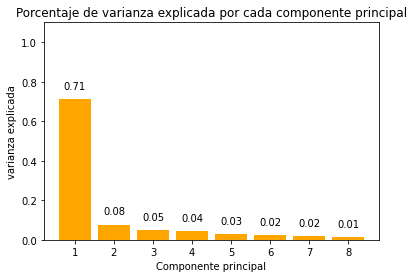

In [14]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_,
    color = "orange"
)

for x, y in zip(np.arange(23) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente principal')
ax.set_xlabel('Componente principal')
ax.set_ylabel('varianza explicada');

In [16]:
nombres_variables_completo = ['Cantidad de buques', 'Cantidad de buques con abono', 'Cantidad de buques con mercancía agroganadero', 'Cantidad de buques con mercancía energetico',
       'Cantidad de buques con mercancía de construccion', 'Cantidad de buques con mercancía no metálica', 'Cantidad de buques con otra mercancía', 'Cantidad de buques con mercancía química',
       'Cantidad de buques con mercancía siderometalútgica', 'Cantidad de buques con vehículos', 'toneladas diarias',
       'toneladas de granel líquido', 'toneladas de granel sólido', 'toneladas de mercancía general', 'Toneladas de abono',
       'Toneladas de mercancía agroganadera', 'Toneladas de mercancía energética', 'Toneladas de mercancía de construcción',
       'Toneladas de mercancía no metálica', 'Toneladas de otras mercancías', 'Toneladas de mercancía química',
       'Toneladas de mercancía siderometalúrgica', 'Toneladas de vehículos']

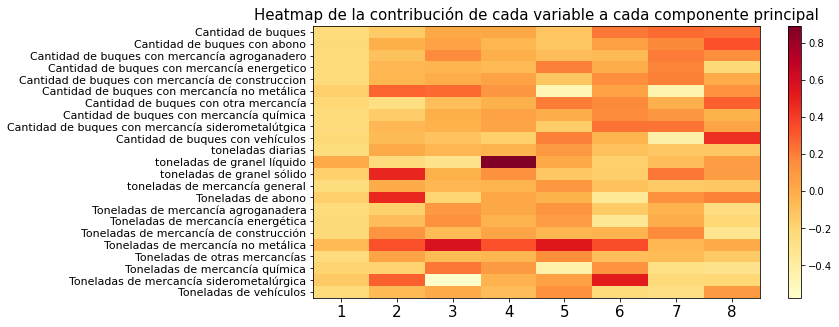

In [22]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = pca.components_
plt.imshow(componentes.T, aspect='auto',cmap = "YlOrRd")
plt.title("Heatmap de la contribución de cada variable a cada componente principal",  fontsize=15)
plt.yticks(range(23),nombres_variables_completo,  fontsize=11)
plt.xticks(range(8), np.arange(pca.n_components_) + 1,  fontsize=15)
plt.grid(False)
plt.colorbar();

In [17]:
df_train_pca=pd.DataFrame(train_pca)
df_test_pca=pd.DataFrame(test_pca)
df_test_pca.to_csv("Variables_test_pca.csv")
df_train_pca.to_csv("Variables_train_pca.csv")

**Probamos la regresión con estas nuevas variables:**

Con 5 folds

Media del coeficiente de determinación:  0.3312729242707514
Desviación típica del coeficiente de determinación: 0.13648487652888686
Media del error cuadrático medio:  -29403.313726953125
Desviación típica del error cuadrático medio: 7956.887773861682
Media del la raíz del error cuadrático medio:  -169.83308360191177
Desviación típica de la raíz del error cuadrático medio: 23.66511020931809
Media del la raíz del MAE:  -134.8583063378312
Desviación típica de MAE: 20.068260092918354


Text(0, 0.5, 'Coeficiente de determinación')

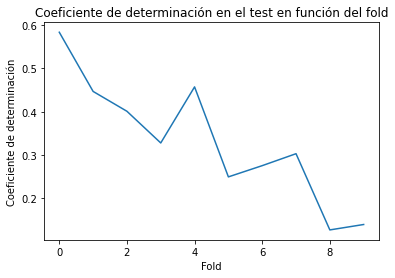

In [18]:
lm = LinearRegression(fit_intercept=True, normalize=True)
scores = cross_validate(lm, train_pca, y_trainR, scoring={"RMSE":'neg_root_mean_squared_error',"Coeficiente de determinacion":'r2',"MSE": "neg_mean_squared_error","MAE": "neg_mean_absolute_error"}, cv=10)
print("Media del coeficiente de determinación: ",np.mean(scores["test_Coeficiente de determinacion"]))
print("Desviación típica del coeficiente de determinación:",np.std(scores["test_Coeficiente de determinacion"]))
print("Media del error cuadrático medio: ",np.mean(scores["test_MSE"]))
print("Desviación típica del error cuadrático medio:",np.std(scores["test_MSE"]))
print("Media del la raíz del error cuadrático medio: ",np.mean(scores["test_RMSE"]))
print("Desviación típica de la raíz del error cuadrático medio:",np.std(scores["test_RMSE"]))
print("Media del la raíz del MAE: ",np.mean(scores["test_MAE"]))
print("Desviación típica de MAE:",np.std(scores["test_MAE"]))

plt.plot(range(0,10),scores["test_Coeficiente de determinacion"])
plt.title("Coeficiente de determinación en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Coeficiente de determinación")

Text(0, 0.5, 'Valor del RMSE')

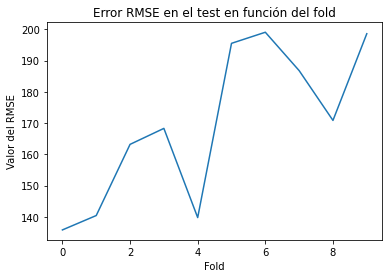

In [19]:
plt.plot(range(0,10),-scores["test_RMSE"])
plt.title("Error RMSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del RMSE")

Text(0, 0.5, 'Valor del MSE')

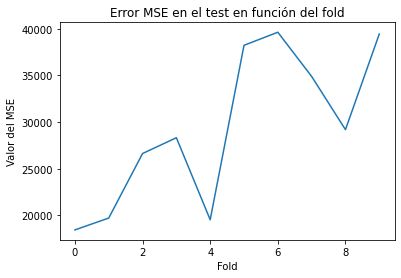

In [20]:
plt.plot(range(0,10),-scores["test_MSE"])
plt.title("Error MSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MSE")

Text(0, 0.5, 'Valor del MAE')

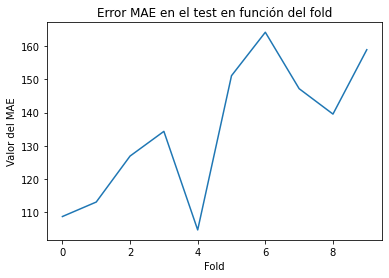

In [21]:
plt.plot(range(0,10),-scores["test_MAE"])
plt.title("Error MAE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MAE")

In [22]:
#Características del modelo creado (valor de los coeficientes)
reg = LinearRegression(fit_intercept=True, normalize=True).fit(train_pca, y_trainR)
print(reg.coef_)
print(reg.intercept_)

[-30.09240433  -1.34983896  32.04813422 -11.53185516   5.47996495
  11.81148289  39.9454245    1.787634  ]
229.52857142857144


In [23]:
#Predicciones en el test
reg.predict(test_pca)

array([352.95098359, 152.96884195, -75.53724778, 245.64811956,
       333.09823479, 297.23918157, 277.71845126, -52.0699966 ,
       333.05979236, 320.87196716, 170.42772099, 307.22880681,
       -65.75081278, 435.831673  , 126.53908652, 315.52958655,
       310.0677758 , 320.41898394, 301.98755787, 156.61776587,
        19.1845289 , 357.37357899,   3.18094375, 228.75211162,
       330.22287397, 308.00695528, 352.55546896, 346.46031967,
       -65.03426775, 337.96077777,   6.81203202, 292.88451464,
       266.28088085, 283.18102901, 271.03089508, 100.16217728,
        85.94856906, 323.53873035, 179.59397704, 142.49940184,
       342.32976791, 394.38235807, 202.79414415, 232.56861991,
       -19.15079195, 271.49598436, 237.22270268, 319.88983636,
       296.91456326, 322.08810078, 330.29912704, 346.05888308,
       152.67901934])

**Todas las variables del dataset**

Media del coeficiente de determinación:  0.36760968645579156
Desviación típica del coeficiente de determinación: 0.12949187934669928
Media del error cuadrático medio:  -27700.006530636387
Desviación típica del error cuadrático medio: 7065.921343808121
Media del la raíz del error cuadrático medio:  -164.9793496038455
Desviación típica de la raíz del error cuadrático medio: 21.950415370295854
Media del la raíz del MAE:  -128.64374663518436
Desviación típica de MAE: 17.695588363063905


Text(0, 0.5, 'Coeficiente de determinación')

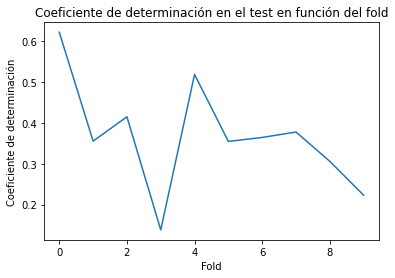

In [24]:
lm = LinearRegression(fit_intercept=True, normalize=True)
scores = cross_validate(lm, X_trainC, y_trainC, scoring={"RMSE":'neg_root_mean_squared_error',"Coeficiente de determinacion":'r2',"MSE": "neg_mean_squared_error","MAE": "neg_mean_absolute_error"}, cv=10)

print("Media del coeficiente de determinación: ",np.mean(scores["test_Coeficiente de determinacion"]))
print("Desviación típica del coeficiente de determinación:",np.std(scores["test_Coeficiente de determinacion"]))
print("Media del error cuadrático medio: ",np.mean(scores["test_MSE"]))
print("Desviación típica del error cuadrático medio:",np.std(scores["test_MSE"]))
print("Media del la raíz del error cuadrático medio: ",np.mean(scores["test_RMSE"]))
print("Desviación típica de la raíz del error cuadrático medio:",np.std(scores["test_RMSE"]))
print("Media del la raíz del MAE: ",np.mean(scores["test_MAE"]))
print("Desviación típica de MAE:",np.std(scores["test_MAE"]))

plt.plot(range(0,10),scores["test_Coeficiente de determinacion"])
plt.title("Coeficiente de determinación en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Coeficiente de determinación")

Text(0, 0.5, 'Valor del MSE')

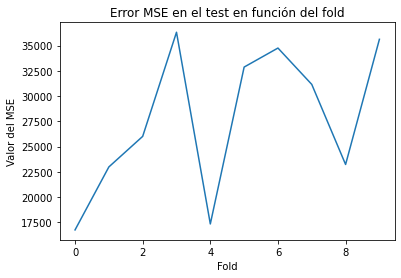

In [25]:
plt.plot(range(0,10),-scores["test_MSE"])
plt.title("Error MSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MSE")

Text(0, 0.5, 'Valor del RMSE')

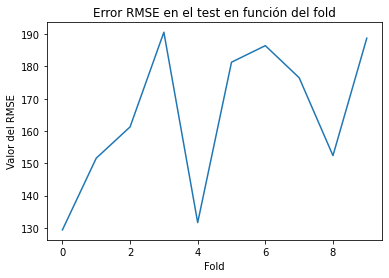

In [26]:
plt.plot(range(0,10),-scores["test_RMSE"])
plt.title("Error RMSE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del RMSE")

Text(0, 0.5, 'Valor del MAE')

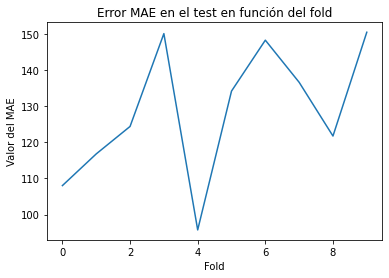

In [27]:
plt.plot(range(0,10),-scores["test_MAE"])
plt.title("Error MAE en el test en función del fold")
plt.xlabel("Fold")
plt.ylabel("Valor del MAE")

In [38]:
#Características del modelo creado (valor de los coeficientes)
reg = LinearRegression(fit_intercept=True, normalize=True).fit(X_trainC, y_trainR)
print(reg.coef_)
print(reg.intercept_)

[ -8.79979888  19.22009039  10.08327363  47.05673874  12.9678686
   9.09520791  15.7801945  -13.76778351  17.39131751 -19.3571349
 -34.89099444  50.06522418  50.10165293  50.11452144 -15.21226487
 -15.26188445 -15.18329682 -15.27599611 -15.10471942 -15.22999891
 -15.22861745 -15.2244301  -15.22386634]
4.277840005074239


In [39]:
#Predicciones en el test
reg.predict(X_testC)

array([ 306.9733323 ,   -7.00776988,  -45.51433468,  366.11372132,
        315.69683393,  440.79672715,  159.62321314,  -85.69444314,
        259.16925639,  467.37652339,   69.77365071,  470.69344904,
         65.36218317,  423.59167775,   -5.83975622,  268.21060365,
        108.29741231,  349.69957115,  247.19114402,  208.1726762 ,
        -17.87280916,  397.49328537,   15.84805557,  404.64574126,
        329.51642018,  353.74518159,  342.18345606,  272.81467545,
          5.73933793,  245.60398751, -121.18362008,  276.89752389,
        441.87942751,  382.82893644,  313.83667229,   70.20942632,
        -41.74057887,  443.92642204,  284.69635348,  191.61391515,
        284.43923279,  362.72000598,  309.70941251,  382.91949626,
         87.88592549,  219.08848044,  301.37703243,  280.17521647,
        391.12199426,  266.25834139,  273.72387557,  426.67203888,
         98.30093817])